In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### (a) APPLE公司2014前兩個月K線圖

In [2]:
APPLE=pd.read_csv('APPL.csv',sep=',')
APPLE.index=pd.to_datetime(APPLE.date)
APPLE.head(n=3)

,Open,High,Low,Close,Volume,Adjusted,date
date,,,,,,,
2014-01-02,555.680008,557.029999,552.020004,553.129990,58671200,76.419139,2014-01-02
2014-01-03,552.860023,553.699989,540.429993,540.980019,98116900,74.740527,2014-01-03
2014-01-06,537.450005,546.800018,533.599983,543.929993,103152700,75.148089,2014-01-06


Text(0.5, 1.0, '蘋果公司股票股票收盤價時序圖')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


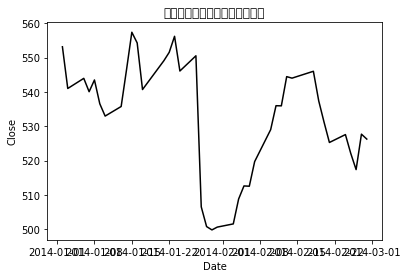

In [3]:
Close=APPLE['2014-01-01':'2014-02-28'].Close
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close,'k')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('蘋果公司股票股票收盤價時序圖')

In [4]:
#### SMA
Sma5=pd.Series(0.0,index=Close.index)

for i in range(4,len(Close)):
    Sma5[i]=np.mean(Close[(i-4):(i+1)])

Sma5.tail()

date
2014-02-24    533.462004
2014-02-25    528.676004
2014-02-26    524.672003
2014-02-27    523.976008
2014-02-28    524.174005
dtype: float64

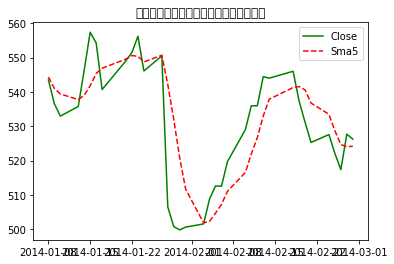

In [5]:
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Sma5[4:],label="Sma5",color='r',linestyle='dashed')
plt.title("蘋果公司股票收盤價與簡單移動平均線图")
plt.legend()

In [6]:
def smaCal(tsPrice,k):
    sma=pd.Series([np.nan]*len(tsPrice),index=tsPrice.index)
    for i in range(k-1,len(tsPrice)):
        sma[i]=np.mean(tsPrice[(i-k+1):(i+1)])
    return(sma)

In [7]:
sma5=smaCal(Close ,5)    
sma5.head()

date
2014-01-02          NaN
2014-01-03          NaN
2014-01-06          NaN
2014-01-07          NaN
2014-01-08    544.30801
dtype: float64

In [8]:
def smaCal_gene(price,k):
    #priceList只存需要計算的k期股價數據
    #用first in first out的方式來存刪數據，進而體現移動的思想
    priceList=[]
    n = len(price)
    for i in range(n):
        #在priceList中增加最新一筆數據
        priceList.append(price[i])
        if len(priceList)==k:
            yield np.mean(priceList)
            #刪除priceList中第0期數據
            priceList.pop(0)

In [9]:
sma5_generator = smaCal_gene(Close ,5)
next(sma5_generator)

544.3080096

In [10]:
##WMA 
b=np.array([1,2,3,4,5])
w=b/sum(b)
w

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

In [11]:
m1Close=Close[:5]
wec=w*m1Close
sum(wec)

542.9560141999999

In [12]:
Wma5=pd.Series([np.nan]*len(Close),index=Close.index)

for i in range(4,len(Close)):
    Wma5[i]=np.sum(w*Close[(i-4):(i+1)])

Wma5[2:7]

date
2014-01-06           NaN
2014-01-07           NaN
2014-01-08    542.956014
2014-01-09    540.360010
2014-01-10    537.678005
dtype: float64

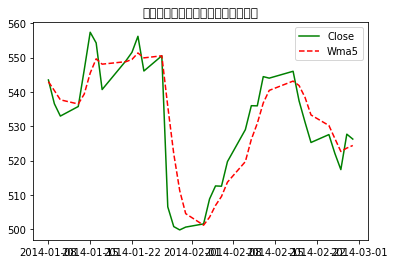

In [13]:
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Wma5[4:],label="Wma5",color='r',linestyle='dashed')
plt.title('蘋果公司股票收盤價加權移動平均線')
plt.legend()

In [14]:
def wmaCal(tsPrice,weight):
    k=len(weight)
    arrWeight=np.array(weight)
    Wma=pd.Series([np.nan]*len(tsPrice),index=tsPrice.index)
    for i in range(k-1,len(tsPrice.index)):
        Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
    return(Wma)

In [15]:
wma5=wmaCal(Close,w)   
wma5.head()

date
2014-01-02           NaN
2014-01-03           NaN
2014-01-06           NaN
2014-01-07           NaN
2014-01-08    542.956014
dtype: float64

In [16]:
wma5=wmaCal(Close,[0.1,0.15,0.2,0.25,0.3])
wma5.tail()

date
2014-02-24    531.012004
2014-02-25    526.965006
2014-02-26    523.132504
2014-02-27    523.708010
2014-02-28    524.323501
dtype: float64

In [17]:
def wmaCal_gene(price,w):
    #priceList只存需要計算的k期股價數據
    #用first in first out的方式來存刪數據，進而體現移動的思想
    priceList=[]
    n = len(price)
    w=np.array(w)
    k=len(w)
    for i in range(n):
        #在priceList中增加最新一筆數據
        priceList.append(price[i])
        if len(priceList)==k:
            yield np.sum(np.array(priceList)*w)
            #刪除priceList中第0期數據
            priceList.pop(0)

In [18]:
wma5_generator=wmaCal_gene(Close,w) 
next(wma5_generator)

542.9560141999999

In [19]:
Ewma5=pd.Series([np.nan]*len(Close),index=Close.index)
Ewma5[4]=np.mean(Close[:4])
for i in range(5,len(Close)):
    Ewma5[i]=0.2*Close[i]+(1-0.2)*Ewma5[i-1]

Ewma5.tail()

date
2014-02-24    531.488625
2014-02-25    529.602902
2014-02-26    527.152322
2014-02-27    527.255861
2014-02-28    527.052684
dtype: float64

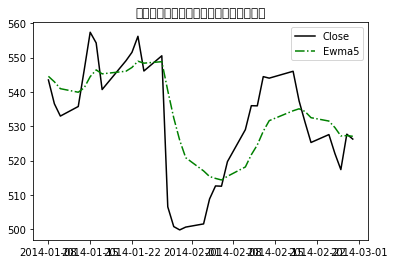

In [20]:
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='k')
plt.plot(Ewma5[4:],label="Ewma5",\
         color='g',linestyle='-.')
plt.title('蘋果公司股票收盤價指數加權移動平均線')
plt.legend()

In [21]:
def ewmaCal(tsprice,period=5,exponential=0.2):
   Ewma=pd.Series([np.nan]*len(tsprice),index=tsprice.index)
   Ewma[period-1]=np.mean(tsprice[:period])
   for i in range(period,len(tsprice)):
       Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1]
   return(Ewma)

Ewma=ewmaCal(Close,5,0.2)
Ewma.tail()

date
2014-02-24    531.488415
2014-02-25    529.602734
2014-02-26    527.152187
2014-02-27    527.255754
2014-02-28    527.052598
dtype: float64

In [22]:
def ewmaCal_gene(price,k,e):
    for i in range(k-1,len(price)):
        if i==k-1:
            ewmaValue=np.mean(price[:k])
        else:
            ewmaValue=e*price[i]+(1-e)*ewmaValue
        yield ewmaValue

ewma_generator=ewmaCal_gene(Close,5,0.2)
next(ewma_generator)
next(ewma_generator)

542.7504070800001

In [23]:
import movingAverage as ma
Ewma10=ma.ewmaCal(Close,10,0.2)
Ewma10.tail(n=3)

date
2014-02-26    527.149666
2014-02-27    527.253737
2014-02-28    527.050985
dtype: float64

In [24]:
#APPLE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import movingAverage as ma
APPLE=pd.read_csv('2330.csv',sep=',')
APPLE.index=pd.to_datetime(APPLE.Date)
Close=APPLE.Close
Close.describe()

count    1242.000000
mean       77.951989
std        23.559931
min        44.630000
25%        58.492500
50%        72.305000
75%        95.770000
max       131.960000
Name: Close, dtype: float64

In [25]:
Close15=Close['2014-01-01':'2014-05-31']

sma10=ma.smaCal(Close15,10)
sma10.tail(n=3)

Date
2014-05-28    111.371
2014-05-29    111.371
2014-05-30    111.143
dtype: float64

In [26]:
weight=np.array(range(1,11))/sum(range(1,11))
wma10=ma.wmaCal(Close15,weight)
wma10.tail(n=3)

Date
2014-05-28    111.727091
2014-05-29    111.710545
2014-05-30    111.279455
dtype: float64

In [27]:
expo= 2/(len(Close15)+1)
ewma10=ma.ewmaCal(Close15,10,expo)
ewma10.tail(n=3)

Date
2014-05-28    104.755237
2014-05-29    104.887050
2014-05-30    104.970140
dtype: float64

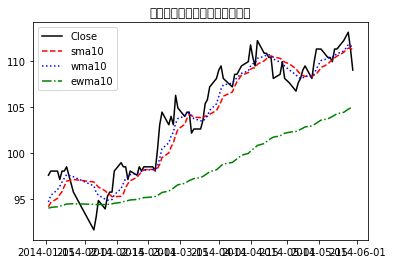

In [28]:
plt.plot(Close15[10:],label="Close",color='k')
plt.plot(sma10[10:],label="sma10",color='r',linestyle='dashed')
plt.plot(wma10[10:],label="wma10",color='b',linestyle=':')
plt.plot(ewma10[10:],label="ewma10",color='g',linestyle='-.')
plt.title('蘋果公司股票股價和三種均線圖')
plt.legend()

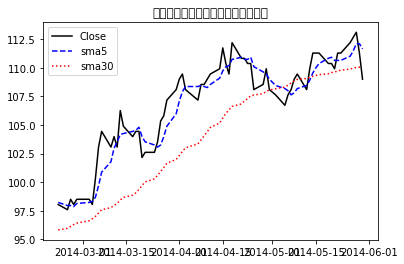

In [29]:
sma5=ma.smaCal(Close15,5)
sma30=ma.smaCal(Close15,30)
plt.plot(Close15[30:],label="Close",color='k')
plt.plot(sma5[30:],label="sma5",color='b',linestyle='dashed')
plt.plot(sma30[30:],label="sma30",color='r',linestyle=':')
plt.title("蘋果公司股票股票價格的長短期均線")
plt.legend()

In [30]:
#trading-sma10 and close
sma10_gene=ma.smaCal_gene(Close,10)
sma10_before = next(sma10_gene)
smaSignal=[]
for i in range(11,len(Close)):
    sma10_now = next(sma10_gene)
    if Close[i-1]<sma10_before and Close[i]>sma10_now:
        smaSignal.append(1)
    elif Close[i-1]>sma10_before and Close[i]<sma10_now:
        smaSignal.append(-1)
    else:
        smaSignal.append(0)
    sma10_before = sma10_now

In [31]:
smaSignal=pd.Series(smaSignal,index=Close.index[11:])

smaTrade=smaSignal.shift(1).dropna()
smaBuy=smaTrade[smaTrade==1]
smaBuy.head(n=3)
smaSell=smaTrade[smaTrade==-1]
smaSell.head(n=3)

Date
2010-02-25   -1.0
2010-03-16   -1.0
2010-04-19   -1.0
dtype: float64

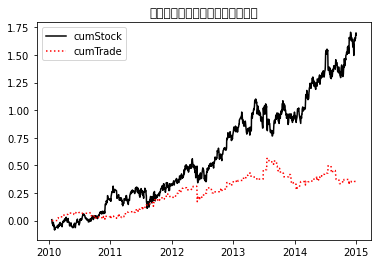

In [32]:
APPLERet=Close/Close.shift(1)-1
smaRet=(APPLERet*smaTrade).dropna()

cumStock=np.cumprod(1+APPLERet[smaRet.index[0]:])-1
cumTrade=np.cumprod(1+smaRet)-1
cumdata=pd.DataFrame({'cumTrade':cumTrade,\
                     'cumStock':cumStock})
cumdata.iloc[-6:,:]

plt.plot(cumStock,label="cumStock",color='k')
plt.plot(cumTrade,label="cumTrade",color='r',linestyle=':')
plt.title('股票本身與均線交易的累積收益率')
plt.legend()

In [33]:
smaRet[smaRet==(-0)]=0
smaWinrate=len(smaRet[smaRet>0])/len(smaRet[smaRet!=0])
smaWinrate

0.5340314136125655

In [34]:
#short  and  long
sma5_gene=ma.smaCal_gene(Close,5)
sma30_gene=ma.smaCal_gene(Close,30)
sma5_before = next(sma5_gene)
sma30_before = next(sma30_gene)
SLSignal=[]
for i in range(31,len(Close)):
    sma5_now = next(sma5_gene)
    sma30_now = next(sma30_gene)
    if sma5_before<sma30_before and sma5_now>sma30_now:
        SLSignal.append(1)
    elif sma5_before>sma30_before and sma5_now<sma30_now:
        SLSignal.append(-1)
    else:
        SLSignal.append(0)
    sma5_before = sma5_now
    sma30_before = sma30_now

SLSignal = pd.Series(SLSignal,index = Close.index[31:])
SLSignal[SLSignal==1]
SLSignal[SLSignal==-1]

SLTrade=SLSignal.shift(1)

In [35]:
Long=pd.Series(0,index=SLTrade.index)
Long[SLTrade==1]=1
LongRet=(Long*APPLERet).dropna()
winLrate=len(LongRet[LongRet>0])/len(LongRet[LongRet!= 0] )
winLrate

0.625

In [36]:
Short= pd.Series(0,index=SLTrade.index)
Short[SLTrade==-1]=-1
ShortRet=(Short*APPLERet).dropna()
winSrate=len(ShortRet[ShortRet>0])/len(ShortRet[ShortRet!=0])
winSrate

0.391304347826087

In [37]:
SLtradeRet=(SLTrade*APPLERet).dropna()
winRate= len(SLtradeRet[SLtradeRet>0])/len(\
         SLtradeRet[SLtradeRet!=0])
winRate

0.5106382978723404

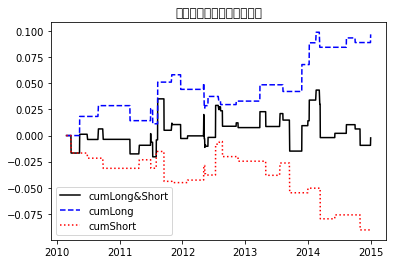

In [38]:
cumLong=np.cumprod(1+LongRet)-1
cumShort=np.cumprod(1+ShortRet)-1
cumSLtrade=np.cumprod(1+SLtradeRet)-1

plt.plot(cumSLtrade,label="cumLong&Short",color='k')
plt.plot(cumLong, label="cumLong",\
         color='b',linestyle='dashed')
plt.plot(cumShort,label="cumShort",\
         color='r',linestyle=':')
plt.title('長短期均線交易累積收益率')
plt.legend(loc='best')

### (b) 繪製DIF、DEA曲線圖和MACD柱狀圖

In [39]:
#MACD
DIF=ma.ewmaCal(Close,12,2/(1+12))\
       -ma.ewmaCal(Close,26,2/(1+26))
DIF.tail(n=3)

Date
2014-12-29    1.031111
2014-12-30    1.124261
2014-12-31    1.259416
dtype: float64

In [40]:
DEA=ma.ewmaCal(DIF.dropna(),9,2/(1+9))
DEA.tail()

Date
2014-12-26    0.620475
2014-12-27    0.656682
2014-12-29    0.731568
2014-12-30    0.810106
2014-12-31    0.899968
dtype: float64

In [41]:
MACD=DIF-DEA
MACD.tail(n=3)

Date
2014-12-29    0.299543
2014-12-30    0.314155
2014-12-31    0.359448
dtype: float64

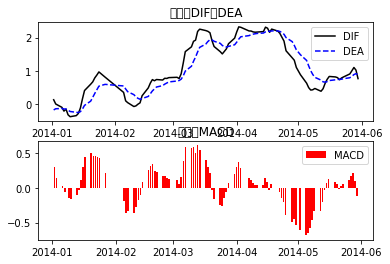

In [42]:
plt.subplot(211)
plt.plot(DIF['2014-01-01':'2014-05-31'],\
      label="DIF",color='k')
plt.plot(DEA['2014-01-01':'2014-05-31'], label="DEA",\
        color='b',linestyle='dashed')
plt.title('信號線DIF与DEA')
plt.legend()
plt.subplot(212)
plt.bar(x=MACD['2014-01-01':'2014-05-31'].index,\
        height=MACD['2014-01-01':'2014-05-31'],\
        label='MACD',color='r')
plt.title('柱狀圖MACD')
plt.legend()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


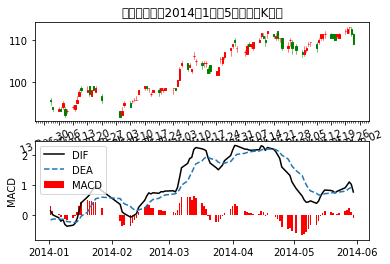

In [43]:
macddata=pd.DataFrame()
macddata['DIF']= DIF['2014-01-01':'2014-05-31']
macddata['DEA']= DEA['2014-01-01':'2014-05-31']
macddata['MACD']= MACD['2014-01-01':'2014-05-31']

import candle
candle.candleLinePlots(APPLE['2014-01-01':'2014-05-31'],\
              candleTitle='蘋果公司股票2014年1月到5月份的日K線圖',\
              splitFigures=True,Data=macddata,\
              ylabel='MACD')

In [44]:
DEA=DEA.dropna()
DIF=DIF[DEA.index]
macdSignal=pd.Series(0,index=DIF.index)

for i in range(1,len(DIF)):
    if all([DIF[i]>DEA[i]>0.0,DIF[i-1]<DEA[i-1]]):
        macdSignal[i]=1
    elif all([DIF[i]<DEA[i]<0.0,DIF[i-1]>DEA[i-1]]):
        macdSignal[i]=-1
macdSignal.tail()

Date
2014-12-26    1
2014-12-27    0
2014-12-29    0
2014-12-30    0
2014-12-31    0
dtype: int64

In [45]:
macdTrade=macdSignal.shift(1)
macdRet=(APPLERet*macdTrade).dropna()
macdRet[macdRet==-0]=0
macdWinRate=len(macdRet[macdRet>0])/len(macdRet[macdRet!=0])
macdWinRate

0.6060606060606061

In [46]:
AllSignal=smaSignal+SLSignal+macdSignal

for i in AllSignal.index:
    if AllSignal[i]>1:
        AllSignal[i]=1
    elif AllSignal[i]<-1:
        AllSignal[i]=-1
    else:
        AllSignal[i]=0

AllSignal[AllSignal==1]

Date
2010-07-06    1.0
2011-06-29    1.0
2011-11-14    1.0
2011-12-21    1.0
2014-02-14    1.0
2014-05-22    1.0
2014-11-19    1.0
dtype: float64

In [47]:
AllSignal[AllSignal==-1]

Date
2010-06-25   -1.0
2012-06-01   -1.0
2013-04-08   -1.0
2013-09-14   -1.0
dtype: float64

In [48]:
tradSig=AllSignal.shift(1).dropna()

Close=Close[-len(tradSig):]
cash=pd.Series(0.0,index=Close.index)
share=pd.Series(0,index=Close.index)

### (c) 交易實測

In [49]:
#當價格連續兩天上升且交易信號沒有顯示賣出時，
#第一次開賬戶持有股票

entry=3
cash[:entry]=1000000
while entry<len(Close):
    cash[entry]=cash[entry-1]
    if all([Close[entry-1]>=Close[entry-2],\
            Close[entry-2]>=Close[entry-3],\
            AllSignal[entry-1]!=-1]):
        share[entry]=1000
        cash[entry]= cash[entry]-1000*Close[entry]
        break
    entry+=1

#根據交易信號交易股票
i=entry+1
while i<len(tradSig):
    cash[i]=cash[i-1]
    share[i]=share[i-1]
    #買入時，買入3000share
    if tradSig[i]==1:
        share[i] = share[i]+3000
        cash[i] = cash[i]-3000*Close[i]
    #賣出時，賣出1000share
    elif tradSig[i]==-1:
        share[i] = share[i]-1000
        cash[i] = cash[i]+1000*Close[i]
    i+=1

asset=cash+share*Close

asset.tail()

Date
2014-12-26    1844080.0
2014-12-27    1835800.0
2014-12-29    1877740.0
2014-12-30    1860820.0
2014-12-31    1877740.0
dtype: float64

0.87774

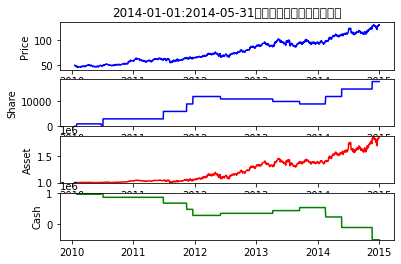

In [50]:
plt.subplot(411)
plt.title('2014-01-01:2014-05-31蘋果公司股票均線交易賬戶')
plt.plot(Close, color='b')
plt.ylabel("Price")
plt.subplot(412)
plt.plot(share, color='b')
plt.ylabel("Share")
plt.ylim(0,max(share)+1000)

plt.subplot(413)
plt.plot(asset,label="asset",color='r')
plt.ylabel("Asset")
plt.ylim(min(asset)-5000,max(asset)+5000)

plt.subplot(414)
plt.plot(cash, label="cash",color='g')
plt.ylabel("Cash")
plt.ylim(min(cash)-500,max(cash)+5000)

TradeReturn=(asset[-1]-1000000)/1000000
TradeReturn